#해킹 종류 별 전체 건수(e-나라 지표 서비스 )

In [ ]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정
# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
from google.colab import files
uploaded = files.upload()

# 업로드된 파일명을 확인하고 file_name에 입력
file_name = list(uploaded.keys())[0]


Saving hacking.xlsx to hacking.xlsx


In [ ]:
import pandas as pd
# 엑셀 파일 읽기
xls = pd.ExcelFile(file_name)
df = xls.parse(xls.sheet_names[0])

# 실제 데이터 부분만 추출
df_clean = df.iloc[2:5].copy()
df_clean.reset_index(drop=True, inplace=True)

# 첫 열을 인덱스로, 나머지 열 이름 지정
df_clean = df_clean.rename(columns={df_clean.columns[0]: '사고유형'})
df_clean.set_index('사고유형', inplace=True)
df_clean.columns = ['2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']

# 숫자로 변환 (쉼표 제거)
df_clean = df_clean.applymap(lambda x: int(str(x).replace(',', '')))
df_clean.head()


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
<ipython-input-19-3972b47fefc4>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(lambda x: int(str(x).replace(',', '')))


,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
사고유형,,,,,,,,,,
홈페이지 변조,615,1056,1724,567,639,764,292,893,178,94
침해사고 신고접수,225,247,287,500,418,603,640,1142,1277,1887
악성코드 은닉사이트 탐지,46850,11044,13347,14754,8299,6034,7043,13661,12731,13967


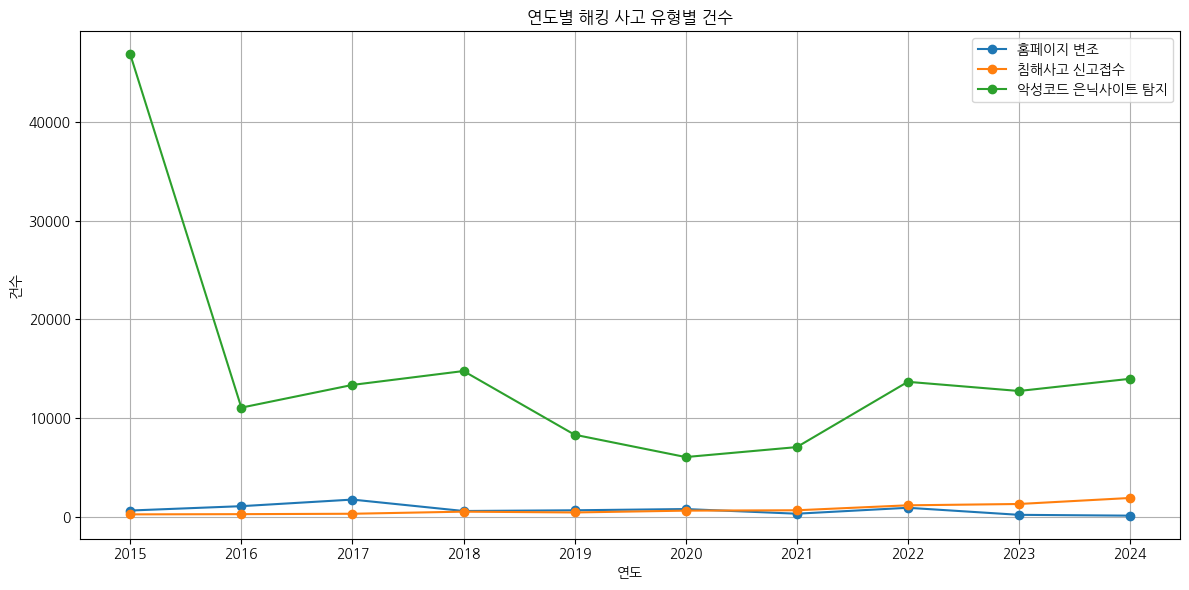

In [ ]:
plt.figure(figsize=(12, 6))
for row in df_clean.index:
    plt.plot(df_clean.columns, df_clean.loc[row], marker='o', label=row)

plt.title('연도별 해킹 사고 유형별 건수')
plt.xlabel('연도')
plt.ylabel('건수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 데이터 분석
공격 방식은 변화하고 있으며, 전통적 공격(홈페이지 변조)은 줄고,

탐지 어려운 악성코드 유포와 신고접수 사건은 오히려 증가하고 있음.

해킹은 줄어든 것이 아니라 더 은밀하고 정교해졌다고 해석할 수 있음.





##코로나에 따른 변화

In [ ]:
import pandas as pd

# 엑셀 파일 읽기
xls = pd.ExcelFile(file_name)
df = xls.parse(xls.sheet_names[0])

# 실제 데이터 부분만 추출
df_clean = df.iloc[2:5].copy()
df_clean.reset_index(drop=True, inplace=True)

# 첫 열을 인덱스로, 나머지 열 이름 지정
df_clean = df_clean.rename(columns={df_clean.columns[0]: '사고유형'})
df_clean.set_index('사고유형', inplace=True)

# 전체 연도 지정
all_years = ['2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
df_clean.columns = all_years

# 숫자로 변환 (쉼표 제거)
df_clean = df_clean.applymap(lambda x: int(str(x).replace(',', '')))

# ✅ 2020~2024년도만 선택
df_filtered = df_clean.loc[:, '2020':'2024']

# 확인
df_filtered.head()


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
<ipython-input-21-d59a5d657d17>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_clean = df_clean.applymap(lambda x: int(str(x).replace(',', '')))


,2020,2021,2022,2023,2024
사고유형,,,,,
홈페이지 변조,764,292,893,178,94
침해사고 신고접수,603,640,1142,1277,1887
악성코드 은닉사이트 탐지,6034,7043,13661,12731,13967


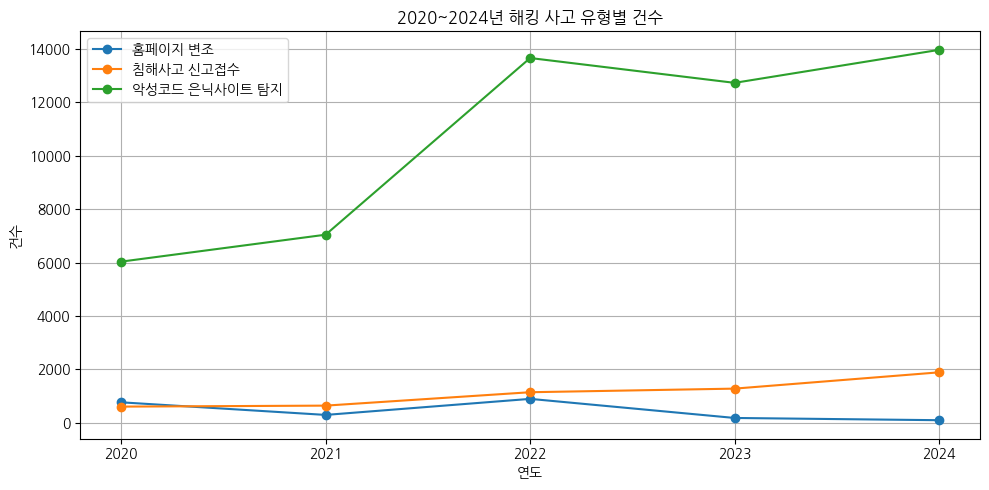

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for row in df_filtered.index:
    plt.plot(df_filtered.columns, df_filtered.loc[row], marker='o', label=row)

plt.title('2020~2024년 해킹 사고 유형별 건수')
plt.xlabel('연도')
plt.ylabel('건수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


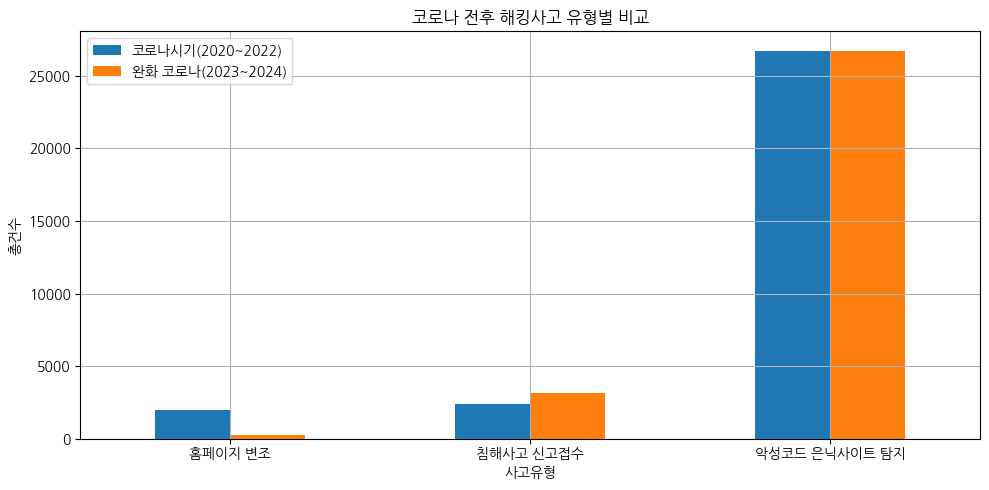

In [ ]:
# 시기별 합계 계산
covid_period = df_clean.loc[:, '2020':'2022'].sum(axis=1)
post_covid_period = df_clean.loc[:, '2023':'2024'].sum(axis=1)

# 데이터프레임 정리
compare_df = pd.DataFrame({
    '코로나시기(2020~2022)': covid_period,
    '완화 코로나(2023~2024)': post_covid_period
})

# 시각화
compare_df.plot(kind='bar', figsize=(10, 5), rot=0, title='코로나 전후 해킹사고 유형별 비교', ylabel='총건수')
plt.grid(True)
plt.tight_layout()
plt.show()


###데이터분석
해킹 수법은 직접적인 변조에서 **은닉형 공격(악성코드 등)**으로 변화

신고접수 증가는 보안 위협 증가와 동시에 사용자 대응 능력 향상의 신호

사이버 보안 전략은 기존 방식을 넘어서 은밀한 위협 탐지에 집중해야 할 필요 있음



###✅결론
해킹은 단순한 침투에서 지능적 위장 및 은닉 중심 공격으로 전환되고 있음

사이버 보안의 중요성은 코로나 전후 상관없이 증가 추세에 있으며, 사회적 변화(재택근무, 온라인 소비 증가)와 밀접한 관련이 있음

특히, 악성코드 유포 및 은닉은 사이버 범죄의 핵심 전략으로 자리잡았고, 대응 체계 강화가 필수임을 보여줌



#해킹 뉴스 기사 수 (빅카인즈)

In [ ]:
# ✅ 1. 폰트 설치 (한글 깨짐 방지)
!apt-get -qq install -y fonts-nanum

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ✅ 2. 필요한 라이브러리
import pandas as pd
import os

# ✅ 3. Colab에 업로드된 실제 파일 이름 기준으로 정리
file_paths = {
    "2020": "/content/뉴스기사_해킹_2020.xlsx",
    "2021": "/content/뉴스기사_해킹_2021.xlsx",
    "2022": "/content/뉴스기사_해킹_2022.xlsx",
    "2023": "/content/뉴스기사_해킹_2023.xlsx",
    "2024": "/content/뉴스기사_해킹_2024.xlsx",
}


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

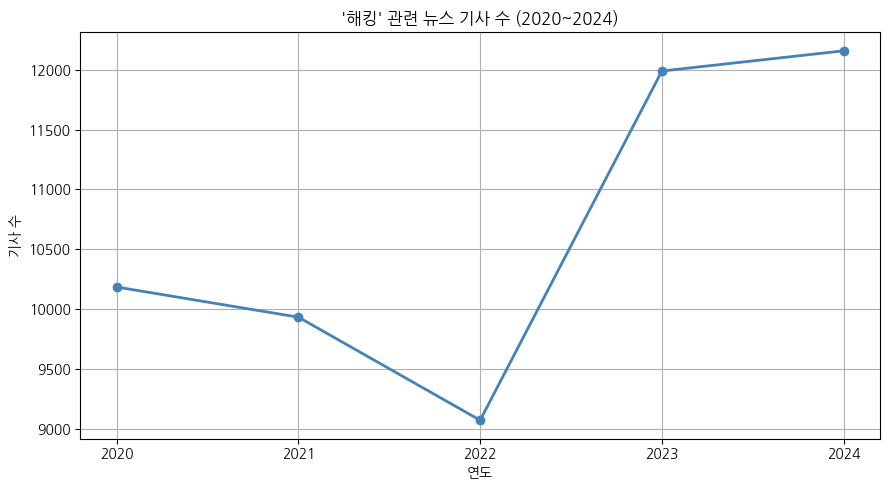

In [ ]:

# ✅ 4. 연도별 기사 수 계산
article_counts = {}
for year, path in file_paths.items():
    df = pd.read_excel(path)
    article_counts[year] = len(df)

# ✅ 5. 데이터프레임으로 변환 및 인덱스 정리
article_df = pd.DataFrame.from_dict(article_counts, orient='index', columns=['기사수'])
article_df.index.name = '연도'
article_df = article_df.sort_index()
article_df.index = article_df.index.map(str)

# ✅ 6. 시각화: 연도별 해킹 기사 수
plt.figure(figsize=(9, 5))
plt.plot(article_df.index, article_df['기사수'], marker='o', linewidth=2, color='steelblue')
plt.title("'해킹' 관련 뉴스 기사 수 (2020~2024)")
plt.xlabel("연도")
plt.ylabel("기사 수")
plt.grid(True)
plt.tight_layout()
plt.show()

###데이터 분석
해킹이 사회적 이슈로 부각되는 시기와 언론 보도는 명확히 연결되어 있음.

단순히 해킹의 실태뿐만 아니라, 사회적 인식 및 보안 경각심이 높아졌음을 반영.

2023년 이후 보도 급증은 사회가 사이버 보안의 중요성을 체감하고 대응 노력을 강화하고 있음을 시사.



<ipython-input-40-7c0af7902ac5>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  covid_avg = article_df.loc[["2020", "2021", "2022"]].mean()[0]
<ipython-input-40-7c0af7902ac5>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  post_covid_avg = article_df.loc[["2023", "2024"]].mean()[0]


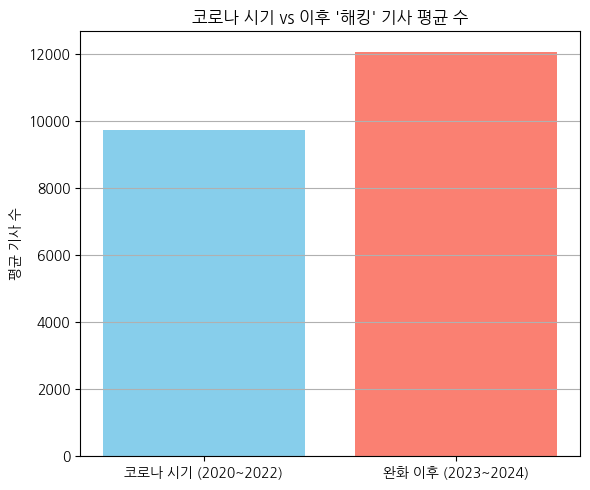

✅ 연도별 기사 수:
         기사수
연도         
2020  10184
2021   9932
2022   9070
2023  11990
2024  12159

📌 코로나 시기 평균 기사 수: 9729건
📌 완화 시기 평균 기사 수: 12074건


In [ ]:

# ✅ 7. 코로나 시기 vs 이후 평균 비교
covid_avg = article_df.loc[["2020", "2021", "2022"]].mean()[0]
post_covid_avg = article_df.loc[["2023", "2024"]].mean()[0]

plt.figure(figsize=(6, 5))
plt.bar(['코로나 시기 (2020~2022)', '완화 이후 (2023~2024)'],
        [covid_avg, post_covid_avg],
        color=['skyblue', 'salmon'])
plt.title("코로나 시기 vs 이후 '해킹' 기사 평균 수")
plt.ylabel("평균 기사 수")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ✅ 8. 수치 출력
print("✅ 연도별 기사 수:\n", article_df)
print(f"\n📌 코로나 시기 평균 기사 수: {covid_avg:.0f}건")
print(f"📌 완화 시기 평균 기사 수: {post_covid_avg:.0f}건")


###데이터 분석
코로나 이후 해킹 뉴스 보도는 뚜렷하게 증가하였다. 이는 단순한 사건 수 증가가 아니라, 사회 전체가 사이버 보안 문제에 대해 더욱 민감하게 반응하고 있음을 보여주는 지표이다.

###📌 결론 및 활용 방안
사건 수와 언론 기사 수는 완전히 일치하지 않지만, 2022~2023년을 기점으로 상관관계 강화

2022년 이후부터는 보안 위협이 더 구체적이고 다양해졌고, 사회도 이에 더 민감하게 반응

해킹 사고와 언론의 흐름을 함께 분석함으로써 사이버 보안에 대한 인식 변화까지 파악 가능



##텍스트 마이닝

In [ ]:
!pip install konlpy wordcloud
!apt-get -qq install -y fonts-nanum

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')  # 한글 폰트 설정
okt = Okt()
stopwords = set(['것', '수', '등', '이', '그', '를', '에', '의', '으로', '에서', '하다', '되다', '있다'])


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


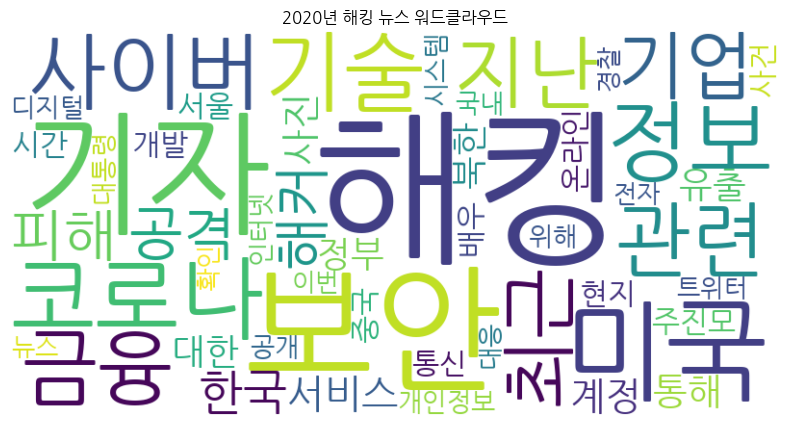

📝 2020년 주요 키워드 (상위 10개):
1. 해킹 (5752회)
2. 보안 (3718회)
3. 기자 (3532회)
4. 미국 (2276회)
5. 코로나 (2066회)
6. 정보 (1974회)
7. 기술 (1880회)
8. 사이버 (1807회)
9. 금융 (1689회)
10. 관련 (1680회)


In [ ]:
df = pd.read_excel('/content/뉴스기사_해킹_2020.xlsx')
texts = df['본문'].dropna().astype(str).tolist()

nouns = []
for text in texts:
    nouns += [word for word in okt.nouns(text) if word not in stopwords and len(word) > 1]

counter = Counter(nouns)
top_words = dict(counter.most_common(50))

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
               background_color='white', width=800, height=400).generate_from_frequencies(top_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("2020년 해킹 뉴스 워드클라우드")
plt.show()

print("📝 2020년 주요 키워드 (상위 10개):")
for i, (word, count) in enumerate(counter.most_common(10), 1):
    print(f"{i}. {word} ({count}회)")


📌 **2020년 해킹 뉴스 시사점**

| 구분           | 내용                             |
|----------------|----------------------------------|
| 주요 사건 키워드 | 코로나, 사이버보안, 금융 유출        |
| 주요 국가 키워드 | 미국, 한국                          |
| 기술적 초점     | 디지털 인프라 보호                   |


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


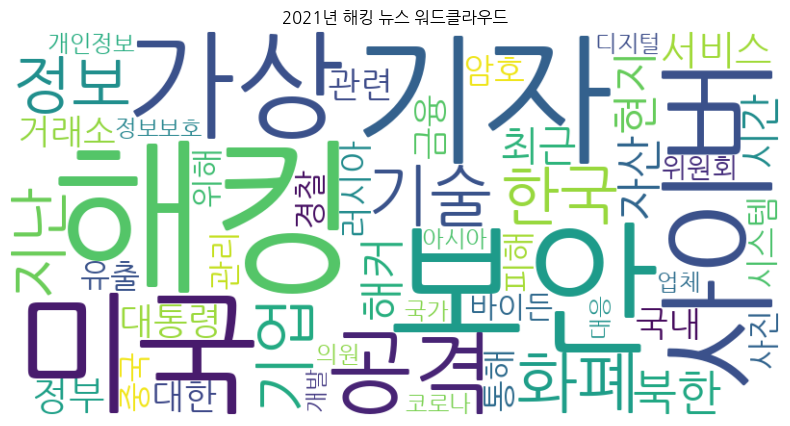

📝 2021년 주요 키워드 (상위 10개):
1. 해킹 (4570회)
2. 보안 (3378회)
3. 기자 (3184회)
4. 미국 (2891회)
5. 사이버 (2416회)
6. 가상 (2342회)
7. 공격 (2037회)
8. 기술 (1979회)
9. 화폐 (1898회)
10. 정보 (1745회)


In [ ]:
df = pd.read_excel('/content/뉴스기사_해킹_2021.xlsx')
texts = df['본문'].dropna().astype(str).tolist()

nouns = []
for text in texts:
    nouns += [word for word in okt.nouns(text) if word not in stopwords and len(word) > 1]

counter = Counter(nouns)
top_words = dict(counter.most_common(50))

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
               background_color='white', width=800, height=400).generate_from_frequencies(top_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("2021년 해킹 뉴스 워드클라우드")
plt.show()

print("📝 2021년 주요 키워드 (상위 10개):")
for i, (word, count) in enumerate(counter.most_common(10), 1):
    print(f"{i}. {word} ({count}회)")


### 📌 2021년 해킹 뉴스 시사점

| 구분 | 내용 |
|------|------|
| 주요 사건 키워드 | 가상자산 해킹, 국제정세 해킹 |
| 주요 국가 키워드 | 미국, 북한, 바이든 |
| 기술적 초점 | 암호화폐, 블록체인 취약점 |


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


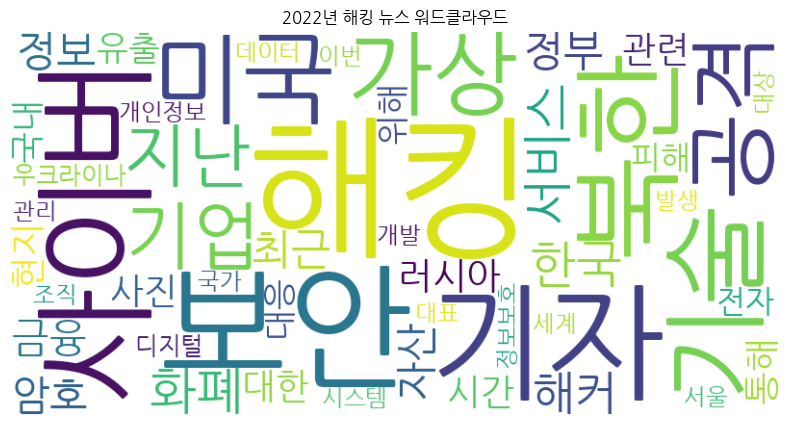

📝 2022년 주요 키워드 (상위 10개):
1. 해킹 (4305회)
2. 보안 (3213회)
3. 기자 (2854회)
4. 사이버 (2733회)
5. 북한 (2116회)
6. 기술 (1947회)
7. 미국 (1661회)
8. 가상 (1624회)
9. 공격 (1570회)
10. 기업 (1560회)


In [ ]:
df = pd.read_excel('/content/뉴스기사_해킹_2022.xlsx')
texts = df['본문'].dropna().astype(str).tolist()

nouns = []
for text in texts:
    nouns += [word for word in okt.nouns(text) if word not in stopwords and len(word) > 1]

counter = Counter(nouns)
top_words = dict(counter.most_common(50))

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
               background_color='white', width=800, height=400).generate_from_frequencies(top_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("2022년 해킹 뉴스 워드클라우드")
plt.show()

print("📝 2022년 주요 키워드 (상위 10개):")
for i, (word, count) in enumerate(counter.most_common(10), 1):
    print(f"{i}. {word} ({count}회)")


### 📌 2022년 해킹 뉴스 시사점

| 구분 | 내용 |
|------|------|
| 주요 사건 키워드 | 해킹, 보안, 가상, 파산, 정보유출, 해커, 암호, 화폐, 사이버 공격 |
| 주요 국가 키워드 | 미국, 한국, 러시아, 우크라이나 |
| 기술적 초점 | 암호화폐와 가상화폐 관련 해킹 사고 급증, 사이버전(Cyber Warfare)의 현실화 |
| 사회·국제 맥락 | 러시아-우크라이나 전쟁 등으로 인해 국가 간 사이버 공격이 증가함. 사이버 안보 중요성 대두 |


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


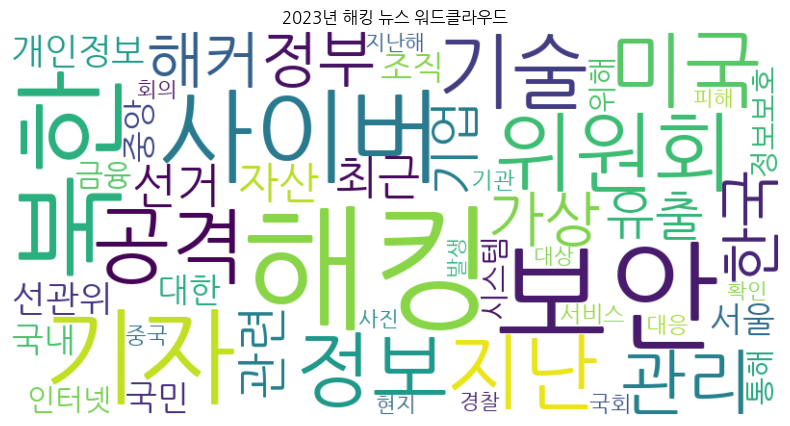

📝 2023년 주요 키워드 (상위 10개):
1. 해킹 (6075회)
2. 보안 (4622회)
3. 북한 (4088회)
4. 기자 (3487회)
5. 사이버 (3379회)
6. 위원회 (2264회)
7. 지난 (2054회)
8. 기술 (2046회)
9. 정보 (2030회)
10. 미국 (2030회)


In [ ]:
df = pd.read_excel('/content/뉴스기사_해킹_2023.xlsx')
texts = df['본문'].dropna().astype(str).tolist()

nouns = []
for text in texts:
    nouns += [word for word in okt.nouns(text) if word not in stopwords and len(word) > 1]

counter = Counter(nouns)
top_words = dict(counter.most_common(50))

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
               background_color='white', width=800, height=400).generate_from_frequencies(top_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("2023년 해킹 뉴스 워드클라우드")
plt.show()

print("📝 2023년 주요 키워드 (상위 10개):")
for i, (word, count) in enumerate(counter.most_common(10), 1):
    print(f"{i}. {word} ({count}회)")


### 📌 2023년 해킹 뉴스 시사점

| 구분 | 내용 |
|------|------|
| 주요 사건 키워드 | 해킹, 보안, 사이버, 공격, 가상, 유출, 관리, 개인정보, 기술, 위원회, 선거 |
| 주요 국가 키워드 | 미국, 중국, 한국 |
| 기술적 초점 | 개인정보 보호 및 사이버 보안 강화, 위원회·기관 중심의 대응체계 부각 |
| 사회·국제 맥락 | 선거를 둘러싼 해킹과 사이버 공격 우려 증가, 공공기관 중심 보안관리 강화 트렌드 |


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


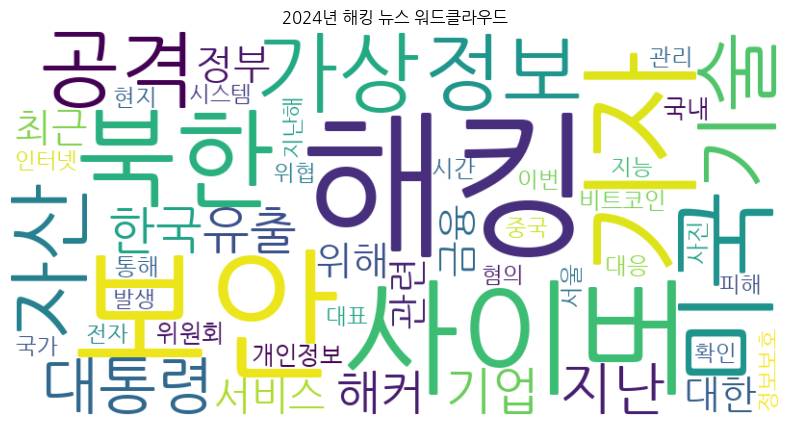

📝 2024년 주요 키워드 (상위 10개):
1. 해킹 (5421회)
2. 보안 (4387회)
3. 사이버 (3318회)
4. 기자 (3183회)
5. 북한 (2336회)
6. 미국 (2286회)
7. 가상 (2215회)
8. 기술 (2120회)
9. 정보 (2058회)
10. 공격 (2007회)


In [ ]:
df = pd.read_excel('/content/뉴스기사_해킹_2024.xlsx')
texts = df['본문'].dropna().astype(str).tolist()

nouns = []
for text in texts:
    nouns += [word for word in okt.nouns(text) if word not in stopwords and len(word) > 1]

counter = Counter(nouns)
top_words = dict(counter.most_common(50))

wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
               background_color='white', width=800, height=400).generate_from_frequencies(top_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("2024년 해킹 뉴스 워드클라우드")
plt.show()

print("📝 2024년 주요 키워드 (상위 10개):")
for i, (word, count) in enumerate(counter.most_common(10), 1):
    print(f"{i}. {word} ({count}회)")


### 📌 2024년 해킹 뉴스 시사점

| 구분 | 내용 |
|------|------|
| 주요 사건 키워드 | 해킹, 보안, 사이버, 공격, 가상, 유출, 정보, 관리, 시스템, 대응, 해커, 인공지능, 비트코인 |
| 주요 국가 키워드 | 북한, 미국, 중국, 한국 |
| 기술적 초점 | 인공지능(AI)·가상자산 등 신기술 보안 위협 대응, 사이버 위협 복합화 |
| 정치·사회 맥락 | 북한·중국 관련 사이버위협 증가, 대통령, 위원회, 협의 등 국가주도 대응 강화 흐름 반영 |


##결론~!

## 🦠 코로나 시기(2020-2022) vs 😷 코로나 완화 시기(2023-2024) 비교 시사점

| 비교 항목     | 코로나 시기 (2020~2022)                                         | 코로나 완화 시기 (2023~2024)                                      |
|---------------|------------------------------------------------------------------|--------------------------------------------------------------------|
| **중심 키워드** | 해킹, 보안, 사이버, 기술, 정보, 코로나                          | 해킹, 보안, 공격, 위원회, 선거, 관리                               |
| **주요 이슈**   | 팬데믹으로 인한 디지털 인프라 의존 증가 → 정보 유출·사이버 침해 증가 | 사회 전반의 디지털 정착 이후 → 정치·행정 시스템 대상 공격 증가      |
| **국가 키워드** | 미국, 한국, 북한, 러시아 (주로 외교/갈등 중심)                   | 미국, 북한, 중국, 한국 (정치적 의제와의 연관 증가)                 |
| **기술 트렌드** | 디지털 보호, 가상자산, 암호화폐 관련 위협 대두                   | 선거 시스템, 위원회 해킹, 인공지능, 정보관리 체계 문제 부각         |
| **사회적 맥락** | 재택근무, 원격수업 등 비대면 환경에서의 보안 취약성 부각          | 디지털 전환 이후 사이버 안보의 제도화·정치화 강화                  |






##📌 요약 분석
**코로나 시기(2020~2022)**는 팬데믹의 영향으로 디지털 의존도가 급격히 증가하면서, 정보보호·금융보안·가상자산 해킹이 핵심 이슈였음.

워드클라우드에 ‘코로나’, ‘사이버’, ‘금융’, ‘유출’ 등의 키워드가 빈번히 나타남.

반면, **코로나 완화 시기(2023~2024)**에는 공공기관, 정부, 선거와 같은 행정·정치 분야 해킹 이슈가 부각됨.

‘위원회’, ‘선거’, ‘대통령’, ‘국회’, ‘공격’, ‘관리’ 등 제도/정책 키워드가 증가하며, 사이버 안보 이슈의 제도화·공공화 경향이 뚜렷해짐.

따라서 코로나 시기의 **"디지털 환경 적응기"**에서, 완화 시기에는 **"디지털 사회의 보안 체계 재정비기"**로 패턴이 변화했음을 알 수 있음.



##🧠 종합적 시사점
해킹은 단순한 기술 이슈를 넘어, 국가 안보, 정치, 신경제(가상자산) 영역으로 확장되고 있음.

따라서 단편적인 대응이 아니라, 정책·기술·국제 협력 차원의 종합 대응 체계 마련이 필수적이라는 점을 데이터가 시사합니다.



이 분석은 **"시간에 따른 해킹 관련 이슈의 흐름과 코로나라는 외부 변수에 따른 사회적, 기술적 사이버보안 변화"**를 파악하고, 향후 위협 대응과 정책 방향 제시에 기초자료를 제공하기 위한 것입니다.